In [1]:
import sys
sys.path.append("../library/")
sys.path.append("../lib/")
import numpy as np
import matplotlib.pyplot as plt
import read_data as rd
from scipy.optimize import minimize_scalar
from sub_plot import *
from defaultPlot import *
from dataProcess import *
from stringFormat import *


In [106]:
time = {}
points = {}
#* ---------------------------------------------------------
orderParameter = {}
#* ---------------------------------------------------------
ageDist = {}
interEventTimeDist = {}
deltaUpperBoundDist = {}
#* ---------------------------------------------------------
interEventTime_orderParameter = {}

In [112]:
# for networkSize in networkSizeList:
for networkSize in [10240000]:
    time[networkSize] = np.arange(0.0, 1.0, 1/networkSize)
    # for acceptanceThreshold in acceptanceThresholdList:
    for acceptanceThreshold in [0.5]:
        current = networkSize, acceptanceThreshold
        points[current] = rd.readPoints(networkSize, acceptanceThreshold)
        #* -------------------------------------------------------
        orderParameter[current] = rd.read("orderParameter", networkSize, acceptanceThreshold)
        #* ---------------------------------------------------------
        ageDist[current] = {}
        interEventTimeDist[current] = {}
        deltaUpperBoundDist[current] = {}
        for state in rd.states:
            ageDist[current][state] = rd.read("ageDist", networkSize, acceptanceThreshold, state)
            interEventTimeDist[current][state] = rd.read("interEventTimeDist", networkSize, acceptanceThreshold, state)
            deltaUpperBoundDist[current][state] = rd.read("deltaUpperBoundDist", networkSize, acceptanceThreshold, state)
        #* ---------------------------------------------------------
        interEventTime_orderParameter[current] = rd.read("interEventTime_orderParameter", networkSize, acceptanceThreshold)

# Age Distribution

In [4]:
networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold


In [7]:
ageDist[10240000,0.5].keys()

dict_keys(['C_1'])

['B_C']


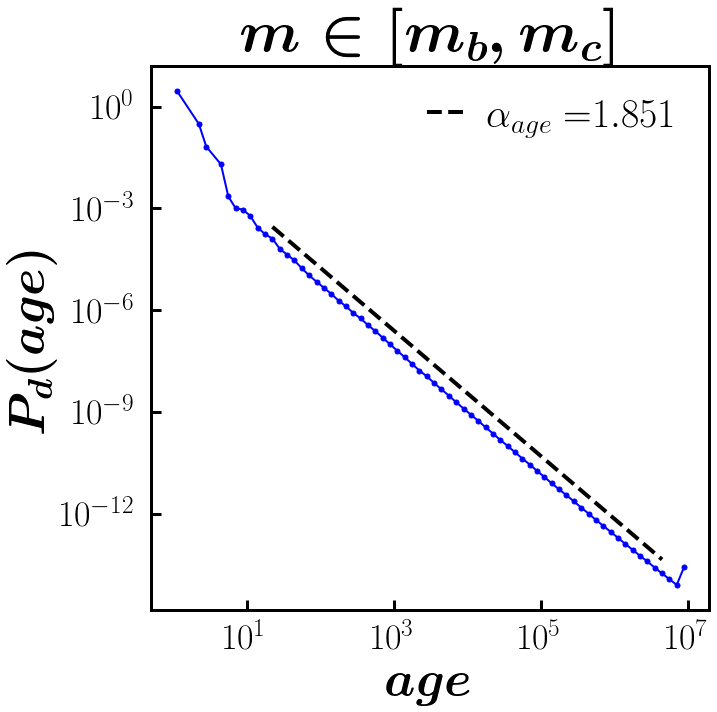

In [54]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

target_state = "B_C"

def plotAgeDist(target_state, fit=False):
    start, end = rd.decompose_state(target_state)
    sub_states = rd.get_sub_state(target_state)
    print(sub_states)
    age = time[networkSize] * networkSize
    dist = np.zeros_like(age)
    for state in sub_states:
        dist += ageDist[current][state]
    age, dist = distLogBin(age, dist)
    ax.plot(age, dist, 'bo-', markersize=5, linewidth=2)
    if fit:
        if target_state == "0_A1":
            fitX, fitY, alpha, _ = logFit(age[15:30], dist[15:30], offset=0.2)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{age}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(age[-23:-10], dist[-23:-10], offset=0.3)
        elif start == ("0" or "B" or "C_1"):
            fitX, fitY, alpha, _ = logFit(age[22:-15], dist[22:-15], offset=-0.5)
        elif start == "A1":
            fitX, fitY, alpha, _ = logFit(age[10:30], dist[10:30], offset=0.5)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{age}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(age[-13:-3], dist[-13:-3], offset=0.3)
        elif start == "A2":
            fitX, fitY, alpha, _ = logFit(age[10:20], dist[10:20], offset=0.5)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{age}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(age[-30:-3], dist[-30:-3], offset=0.3)
        else:
            fitX, fitY, alpha, _ = logFit(age[10:-3], dist[10:-3], offset=-0.5)
        ax.plot(fitX, fitY, 'k--', label=latex_string("\\alpha_{age}=") + latex_float(-alpha, 3))

plotAgeDist(target_state, fit=True)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("age"))
ax.set_ylabel(latex_bold_string("P_d(age)"))
ax.legend(loc='best')
ax.set_title(latex_bold_string(rd.state2title("m", target_state)))

# fig.savefig("../data/mBFW/fig/ageDist(N{:.1e},G{:.1f})_".format(*current) + target_state + ".pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


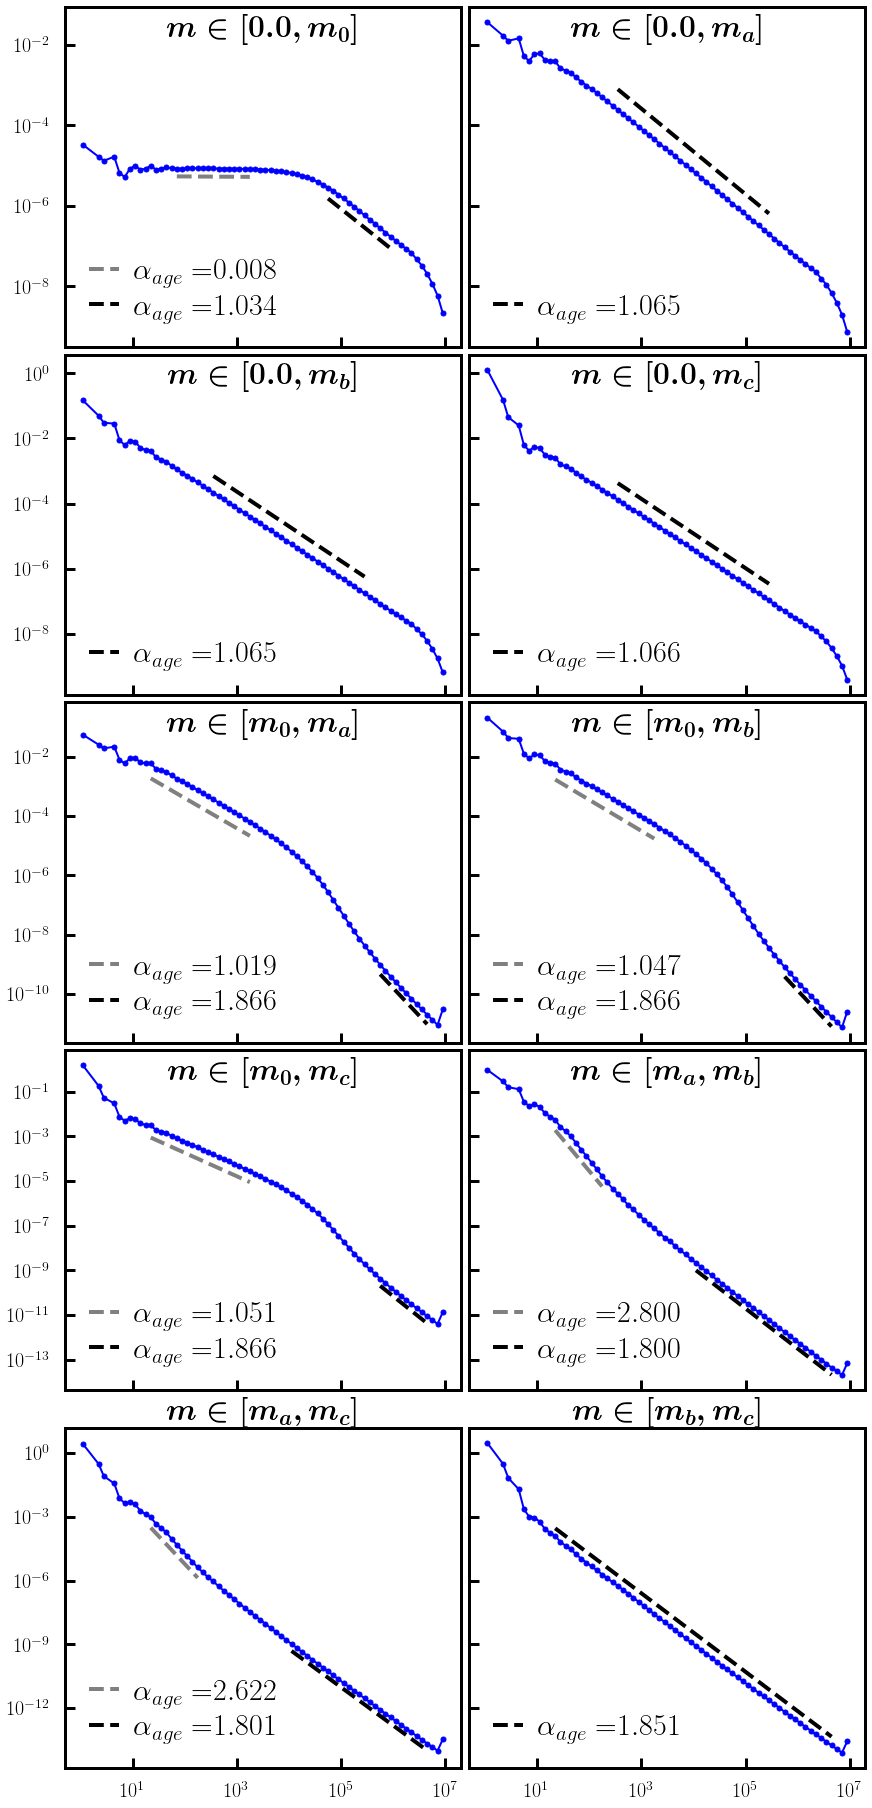

In [40]:
fig, ax = plt.subplots(5, 2, sharex=True, sharey='row', figsize=(12,25), constrained_layout=True)
[[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8], [ax9, ax10]] = ax

def plotAgeDist(ax, target_state, fit=False):
    ax.set_rasterized(True)
    start, end = rd.decompose_state(target_state)
    sub_states = rd.get_sub_state(target_state)
    age = time[networkSize] * networkSize
    dist = np.zeros_like(age)
    for state in sub_states:
        dist += ageDist[current][state]
    age, dist = distLogBin(age, dist)
    ax.plot(age, dist, 'bo-', markersize=5, linewidth=2)
    if fit:
        if target_state == "0_A1":
            fitX, fitY, alpha, _ = logFit(age[15:30], dist[15:30], offset=0.2)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{age}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(age[-23:-10], dist[-23:-10], offset=0.3)
        elif start == ("0" or "B" or "C_1"):
            fitX, fitY, alpha, _ = logFit(age[22:-15], dist[22:-15], offset=-0.5)
        elif start == "A1":
            fitX, fitY, alpha, _ = logFit(age[10:30], dist[10:30], offset=0.5)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{age}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(age[-13:-3], dist[-13:-3], offset=0.3)
        elif start == "A2":
            fitX, fitY, alpha, _ = logFit(age[10:20], dist[10:20], offset=0.5)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{age}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(age[-30:-3], dist[-30:-3], offset=0.3)
        else:
            fitX, fitY, alpha, _ = logFit(age[10:-3], dist[10:-3], offset=-0.5)
        ax.plot(fitX, fitY, 'k--', label=latex_string("\\alpha_{age}=") + latex_float(-alpha, 3))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(latex_bold_string(rd.state2title("m", target_state)), fontsize=30, pad=-30)
    ax.legend(loc='lower left', fontsize=30)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

plotAgeDist(ax1, "0_A1", fit=True)
plotAgeDist(ax2, "0_A2", fit=True)
plotAgeDist(ax3, "0_B", fit=True)
plotAgeDist(ax4, "0_C", fit=True)
plotAgeDist(ax5, "A1_A2", fit=True)
plotAgeDist(ax6, "A1_B", fit=True)
plotAgeDist(ax7, "A1_C", fit=True)
plotAgeDist(ax8, "A2_B", fit=True)
plotAgeDist(ax9, "A2_C", fit=True)
plotAgeDist(ax10, "B_C", fit=True)

# fig.savefig("../data/mBFW/fig/ageDist_interval.pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


# Interevent Time Distribution

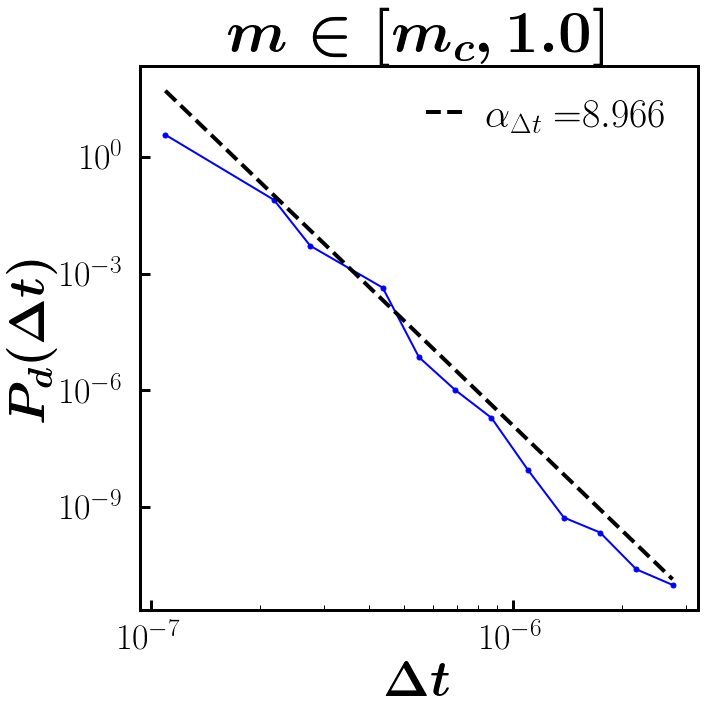

In [39]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

target_state = "C_1"

def plotIETDist(target_state, fit=False):
    start, end = rd.decompose_state(target_state)
    sub_states = rd.get_sub_state(target_state)
    iet_dist = {}
    for state in sub_states:
        for t,d in zip(interEventTimeDist[current][state][0], interEventTimeDist[current][state][1]):
            if t in iet_dist:
                iet_dist[t] += d
            else:
                iet_dist[t] = d
    iet, dist = distLogBin(np.array(list(iet_dist.keys())), np.array(list(iet_dist.values())))
    iet /= networkSize
    ax.plot(iet, dist, 'bo-', markersize=5, linewidth=2)
    if fit:
        if target_state == "0_A1":
            fitX, fitY, alpha, _ = logFit(iet[-17:-7], dist[-17:-7], offset=-0.5)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{\\Delta t}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(iet[10:30], dist[10:30], offset=-0.5)
        elif start == "0" or start == "A1":
            fitX, fitY, alpha, _ = logFit(iet[15:-8], dist[15:-8], offset=-0.5)

        elif start == "A2":
            fitX, fitY, alpha, _ = logFit(iet[2:-5], dist[2:-5], offset=-0.5)
        else:
            fitX, fitY, alpha, _ = logFit(iet[:], dist[:], offset=-0.5)
        ax.plot(fitX, fitY, 'k--', label=latex_string("\\alpha_{\\Delta t}=") + latex_float(-alpha, 3))

plotIETDist(target_state, fit=True)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("\\Delta t"))
ax.set_ylabel(latex_bold_string("P_d(\\Delta t)"))
ax.legend(loc='best')
ax.set_title(latex_bold_string(rd.state2title("m", target_state)))

# fig.savefig("../data/mBFW/fig/ietDist(N{:.1e},G{:.1f})_".format(*current) + target_state + ".pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


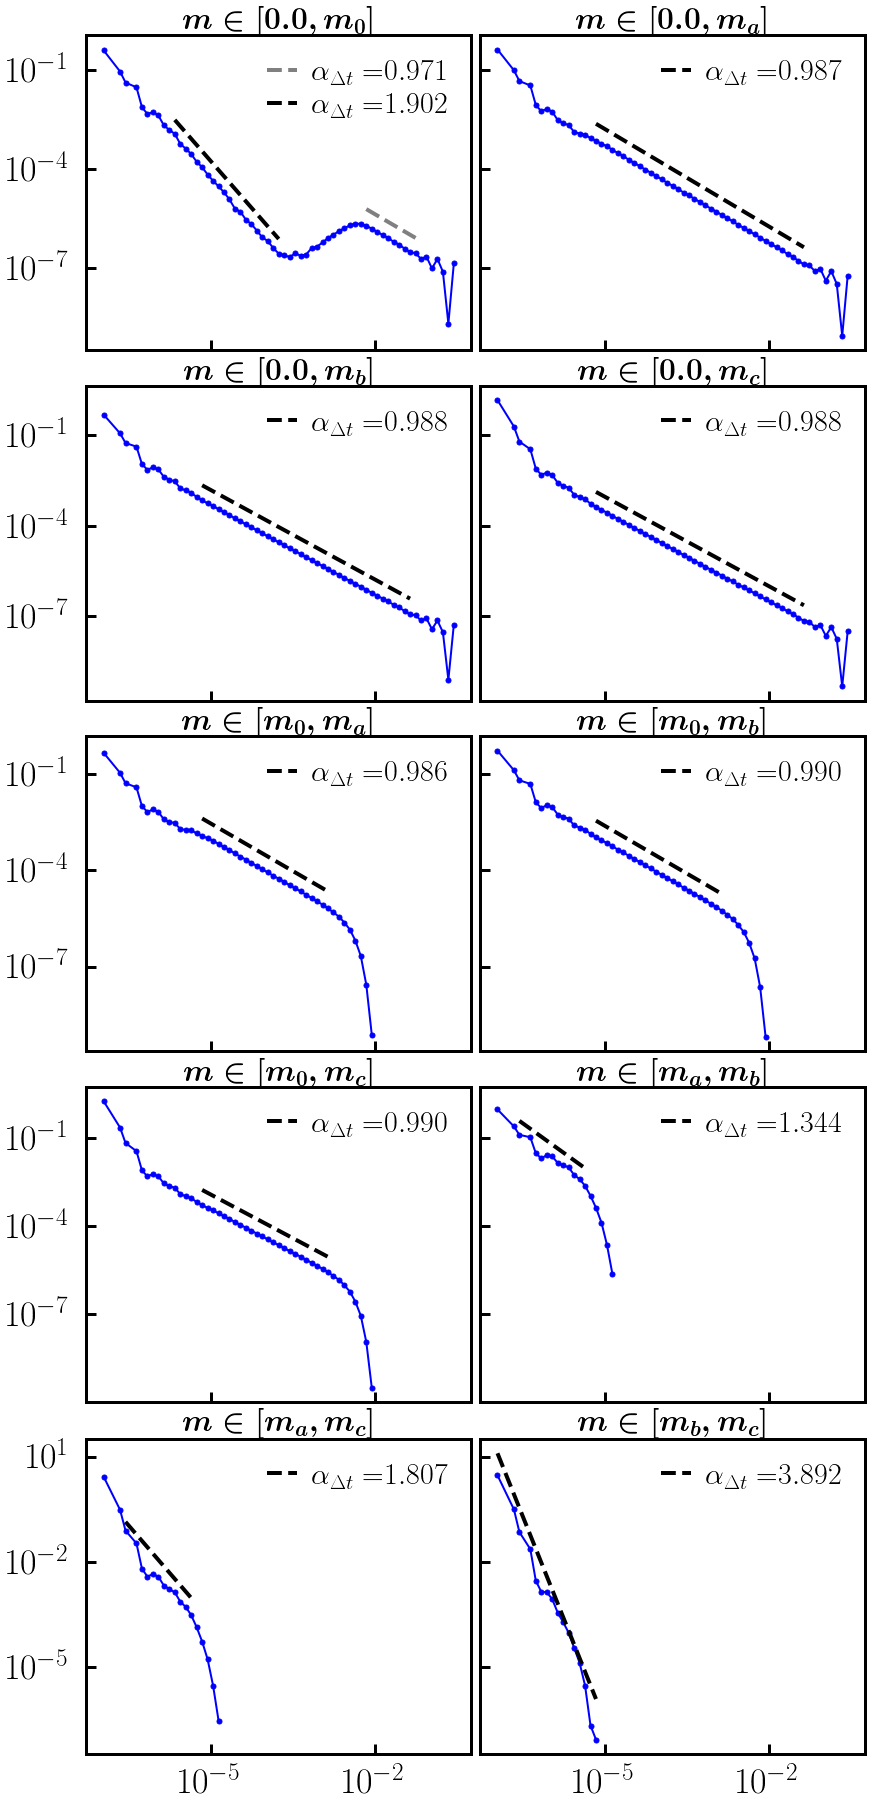

In [102]:
fig, ax = plt.subplots(5, 2, sharex=True, sharey='row', figsize=(12,25), constrained_layout=True)
[[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8], [ax9, ax10]] = ax


def plotIETDist(ax, target_state, fit=False):
    ax.set_rasterized(True)
    start, end = rd.decompose_state(target_state)
    sub_states = rd.get_sub_state(target_state)
    iet_dist = {}
    for state in sub_states:
        for t,d in zip(interEventTimeDist[current][state][0], interEventTimeDist[current][state][1]):
            if t in iet_dist:
                iet_dist[t] += d
            else:
                iet_dist[t] = d
    iet, dist = distLogBin(np.array(list(iet_dist.keys())), np.array(list(iet_dist.values())))
    iet /= networkSize
    ax.plot(iet, dist, 'bo-', markersize=5, linewidth=2)
    if fit:
        if target_state == "0_A1":
            fitX, fitY, alpha, _ = logFit(iet[-17:-7], dist[-17:-7], offset=-0.5)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{\\Delta t}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(iet[10:30], dist[10:30], offset=-0.5)
        elif start == "0" or start == "A1":
            fitX, fitY, alpha, _ = logFit(iet[15:-8], dist[15:-8], offset=-0.5)

        elif start == "A2":
            fitX, fitY, alpha, _ = logFit(iet[2:-5], dist[2:-5], offset=-0.5)
        else:
            fitX, fitY, alpha, _ = logFit(iet[:], dist[:], offset=-0.5)
        ax.plot(fitX, fitY, 'k--', label=latex_string("\\alpha_{\\Delta t}=") + latex_float(-alpha, 3))

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='upper right', fontsize=30)
    ax.set_title(latex_bold_string(rd.state2title("m", target_state)), fontsize=30)

plotIETDist(ax1, "0_A1", fit=True)
plotIETDist(ax2, "0_A2", fit=True)
plotIETDist(ax3, "0_B", fit=True)
plotIETDist(ax4, "0_C", fit=True)
plotIETDist(ax5, "A1_A2", fit=True)
plotIETDist(ax6, "A1_B", fit=True)
plotIETDist(ax7, "A1_C", fit=True)
plotIETDist(ax8, "A2_B", fit=True)
plotIETDist(ax9, "A2_C", fit=True)
plotIETDist(ax10, "B_C", fit=True)


fig.savefig("../data/mBFW/fig/ietDist_interval.pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()

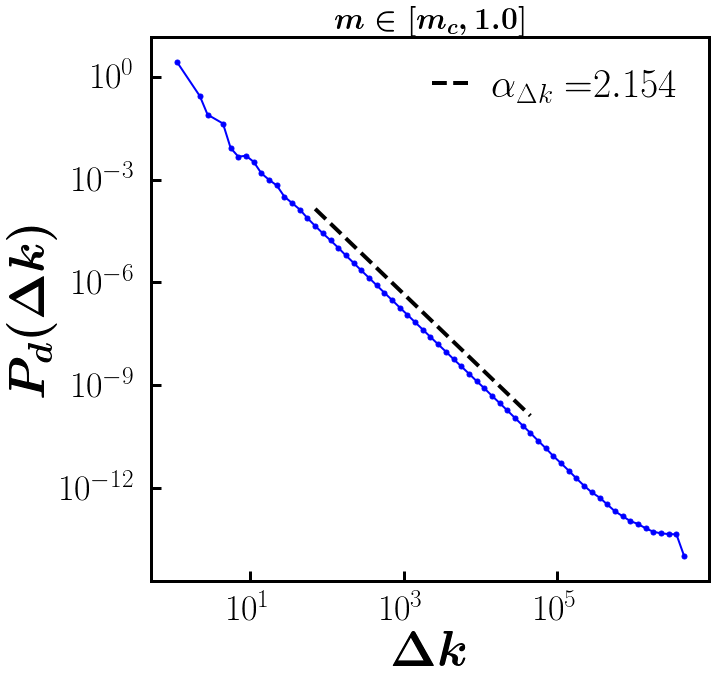

In [98]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

target_state = "C_1"

def plotDKDist(target_state, fit=False):
    start, end = rd.decompose_state(target_state)
    sub_states = rd.get_sub_state(target_state)
    dk_dist = {}
    for state in sub_states:
        for dk,d in zip(deltaUpperBoundDist[current][state][0], deltaUpperBoundDist[current][state][1]):
            if dk in dk_dist:
                dk_dist[dk] += d
            else:
                dk_dist[dk] = d
    dk, dist = distLogBin(np.array(list(dk_dist.keys())), np.array(list(dk_dist.values())))
    ax.plot(dk, dist, 'bo-', markersize=5, linewidth=2)
    if fit:
        if target_state == "0_1" or target_state == "A1_1":
            fitX, fitY, alpha, _ = logFit(dk[-15:-3], dist[-15:-3], offset=-0.5)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{\\Delta k}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(dk[10:30], dist[10:30], offset=-0.5)
        elif target_state == "0_A1" :
            fitX, fitY, alpha, _ = logFit(dk[5:-5], dist[5:-5], offset=-0.5)
        elif target_state == "A2_B":
            fitX, fitY, alpha, _ = logFit(dk[7:-30], dist[7:-30], offset=-0.5)
        elif start == "A1":
            fitX, fitY, alpha, _ = logFit(dk[25:-5], dist[25:-5], offset=-0.5)
        elif start in ["0","A2","B","C"]:
            fitX, fitY, alpha, _ = logFit(dk[15:-20], dist[15:-20], offset=-0.5)
        ax.plot(fitX, fitY, 'k--', label=latex_string("\\alpha_{\\Delta k}=") + latex_float(-alpha, 3))

plotDKDist(target_state, True)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("\\Delta k"))
ax.set_ylabel(latex_bold_string("P_d(\\Delta k)"))
ax.legend(loc='best')
ax.set_title(latex_bold_string(rd.state2title("m", target_state)), fontsize=30)

# fig.savefig("../data/mBFW/fig/deltaKDist(N{:.1e},G{:.1f})_".format(*current) + target_state + ".pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


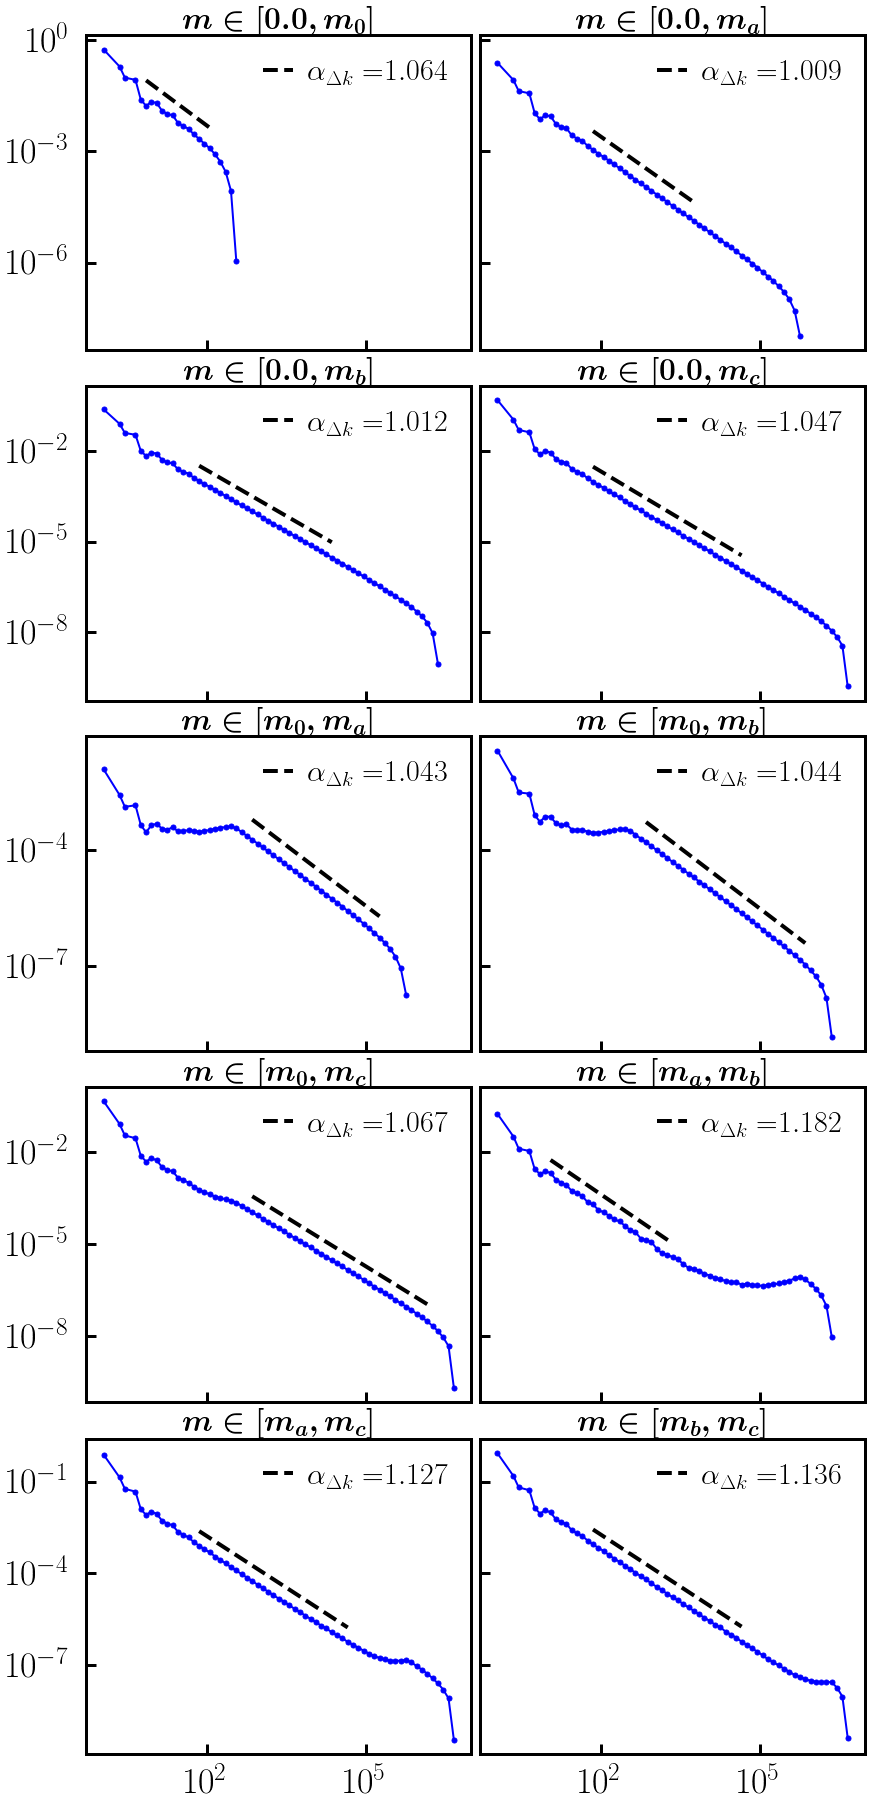

In [103]:
fig, ax = plt.subplots(5, 2, sharex=True, sharey='row', figsize=(12,25), constrained_layout=True)
[[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8], [ax9, ax10]] = ax

def plotDKDist(ax, target_state, fit=False):
    start, end = rd.decompose_state(target_state)
    sub_states = rd.get_sub_state(target_state)
    dk_dist = {}
    for state in sub_states:
        for dk,d in zip(deltaUpperBoundDist[current][state][0], deltaUpperBoundDist[current][state][1]):
            if dk in dk_dist:
                dk_dist[dk] += d
            else:
                dk_dist[dk] = d
    dk, dist = distLogBin(np.array(list(dk_dist.keys())), np.array(list(dk_dist.values())))
    ax.plot(dk, dist, 'bo-', markersize=5, linewidth=2)
    if fit:
        if target_state == "0_1" or target_state == "A1_1":
            fitX, fitY, alpha, _ = logFit(dk[-15:-3], dist[-15:-3], offset=-0.5)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{\\Delta k}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(dk[10:30], dist[10:30], offset=-0.5)
        elif target_state == "0_A1" :
            fitX, fitY, alpha, _ = logFit(dk[5:-5], dist[5:-5], offset=-0.5)
        elif target_state == "A2_B":
            fitX, fitY, alpha, _ = logFit(dk[7:-30], dist[7:-30], offset=-0.5)
        elif start == "A1":
            fitX, fitY, alpha, _ = logFit(dk[25:-5], dist[25:-5], offset=-0.5)
        elif start in ["0","A2","B","C"]:
            fitX, fitY, alpha, _ = logFit(dk[15:-20], dist[15:-20], offset=-0.5)
        ax.plot(fitX, fitY, 'k--', label=latex_string("\\alpha_{\\Delta k}=") + latex_float(-alpha, 3))

        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend(loc='upper right', fontsize=30)
        ax.set_title(latex_bold_string(rd.state2title("m", target_state)), fontsize=30)

plotDKDist(ax1, "0_A1", fit=True)
plotDKDist(ax2, "0_A2", fit=True)
plotDKDist(ax3, "0_B", fit=True)
plotDKDist(ax4, "0_C", fit=True)
plotDKDist(ax5, "A1_A2", fit=True)
plotDKDist(ax6, "A1_B", fit=True)
plotDKDist(ax7, "A1_C", fit=True)
plotDKDist(ax8, "A2_B", fit=True)
plotDKDist(ax9, "A2_C", fit=True)
plotDKDist(ax10, "B_C", fit=True)


fig.savefig("../data/mBFW/fig/dKDist_interval.pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()

# Interevent time vs order parameter

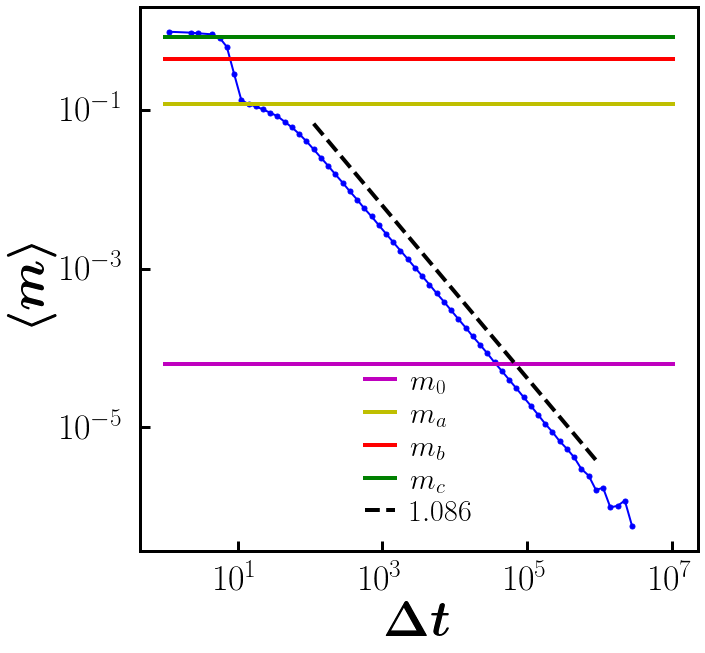

In [118]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
m_a1 = points[current]["m_a1"]
m_a2 = points[current]["m_a2"]
m_b = points[current]["m_b"]
m_c = points[current]["m_c"]

iet, op = avgLogBin(*interEventTime_orderParameter[current])
ax.plot(iet, op, 'bo-', markersize=5, linewidth=2)
ax.plot([1, networkSize], [m_a1, m_a1], 'm-', label=latex_string("m_0"))
ax.plot([1, networkSize], [m_a2, m_a2], 'y-', label=latex_string("m_a"))
ax.plot([1, networkSize], [m_b, m_b], 'r-', label=latex_string("m_b"))
ax.plot([1, networkSize], [m_c, m_c], 'g-', label=latex_string("m_c"))

fitX, fitY, alpha, _ = logFit(iet[17:-5], op[17:-5], offset=-0.3)
ax.plot(fitX, fitY, 'k--', label=latex_float(-alpha, 3))

ax.set_xlabel(latex_bold_string("\\Delta t"))
ax.set_ylabel(latex_bold_string("\langle m \\rangle"))
ax.legend(loc='best', fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')

# fig.savefig("../data/mBFW/fig/m_iet(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
plt.show()
